<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/practice_final/Two_Sided_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#@title **Imports** { display-mode: "form" }
import jax 
import jax.numpy as jnp 
from functools import partial 
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [105]:
#@title **Functions of Interest** { display-mode: "form" }
views = lambda q: jnp.sqrt(q)*10000
quality = lambda e: e
revenue = lambda m, e : m*views(quality(e))
cost = lambda e: 2.0 + (e*5)**2
profit = lambda m, e: revenue(m, e) - cost(e)

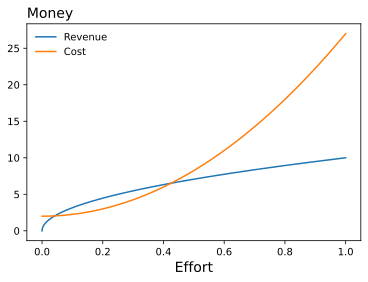

In [106]:
#@title **Graph 1** { display-mode: "form" }
es = jnp.linspace(0, 1, 1000)
rs = jax.vmap(partial(revenue, 0.001))(es)
cs = jax.vmap(cost)(es)
plt.plot(es, rs, label='Revenue')
plt.plot(es, cs, label='Cost')
plt.title('Money', loc='left', size=14)
plt.xlabel('Effort', size=14)
plt.legend(frameon=False)
plt.show()

In [107]:
#@title **Solver**
def gradient_descent(f, a):
  """Returns a compiled function""" #Don't worry about this if you haven't heard of it before
  @jax.jit
  def update(x):
    new_x = x - a*jax.grad(f)(x)
    return jnp.clip(new_x, a_min=0.0, a_max=1.0)
  return update

def solver(lr, n, m):

  step = gradient_descent(lambda x: -1.0*profit(m, x), lr)

  def update(x, t):
    x_new = step(x)
    return x_new, ()
  opt_param, _ = jax.lax.scan(update, 0.5, xs=None, length=n)
  return opt_param 

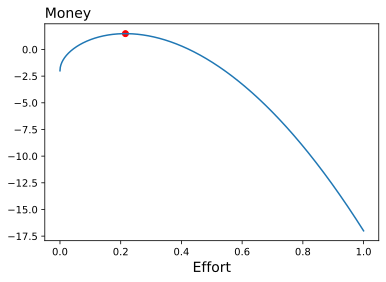

In [108]:
#@title **Graph 2** { display-mode: "form" }
m = 0.001 
ps = jax.vmap(partial(profit, m))(es)
plt.plot(es, ps)
x_opt = solver(0.001, 100, m)
plt.scatter(x_opt, profit(m, x_opt), color='red')
plt.title('Money', loc='left', size=14)
plt.xlabel('Effort', size=14)
plt.show()

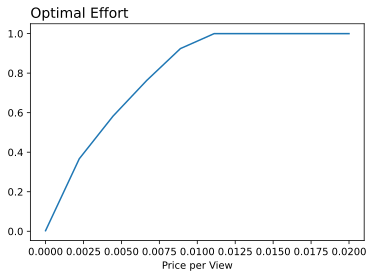

In [131]:
#@title **Graph 3** { display-mode: "form" }
ms = jnp.linspace(0., .02, 10)
es = jax.vmap(partial(solver, 0.001, 100))(ms)
plt.plot(ms, es)
plt.title('Optimal Effort', loc='left', size=14)
plt.xlabel('Price per View')
plt.show()

In [132]:
#@title **Firm Profit Function** { display-mode: "form" }
def firm_profit(p, m): 
  e_star = solver(0.001, 100, m)
  v = views(e_star)
  return (p-m)*v

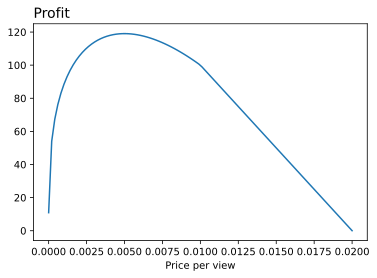

In [134]:
#@title **Graph 4** { display-mode: "form" }
p = 0.02 
ms = jnp.linspace(0., .02, 100)
es = jax.vmap(partial(firm_profit, p))(ms)
plt.plot(ms, es)
plt.title('Profit', loc='left', size=14)
plt.xlabel('Price per view')
plt.show()